# Reassignment

As you may have discovered, it is legal to make more than one assignment to the same variable. A new assignment makes an existing variable refer to a new value (and stop referring to the old value).

In [1]:
x = 5

5

In [2]:
x = 7

7

The first time we display x, its value is 5; the second time, its value is 7. *Reassignment* can be represented in a state diagram.

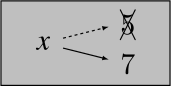

In [1]:
using TikzPictures
TikzPicture(L"""
    \node [draw, fill=lightgray, minimum width=2cm, minimum height=1cm]{}; 
    \node(var) at(-0.5,0) {$x$};
    \node(old) at(0.5,0.25) {$\xcancel{5}$};
    \node(new) at(0.5,-0.25) {$7$};
    \draw[-latex, dashed] (var) -- (old);
    \draw[-latex] (var) -- (new);
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

At this point I want to address a common source of confusion. Because Julia uses the equal sign (`=`) for assignment, it is tempting to interpret a statement like `a = b` as a mathematical proposition of equality; that is, the claim that `a` and `b` are equal. But this interpretation is wrong.

First, equality is a symmetric relationship and assignment is not. For example, in mathematics, if $a=7$ then $7=a$. But in julia, the statement `a = 7` is legal and `7 = a` is not.

Also, in mathematics, a proposition of equality is either true or false for all time. If $a=b$ now, then $a$ will always equal $b$. In Julia, an assignment statement can make two variables equal, but they don’t have to stay that way:

In [4]:
a = 5
b = a
a = 3
b

5

The third line changes the value of `a` but does not change the value of `b`, so they are no longer equal.

Reassigning variables is often useful, but you should use it with caution. If the values of variables change frequently, it can make the code difficult to read and debug.

# Updating variables

A common kind of reassignment is an *update*, where the new value of the variable depends on the old.

In [5]:
x = x + 1

8

This means “get the current value of `x`, add one, and then update `x` with the new value.”
If you try to update a variable that doesn’t exist, you get an error, because Julia evaluates the right side before it assigns a value to `y`:

In [6]:
y = y + 1

LoadError: [91mUndefVarError: y not defined[39m

Before you can update a variable, you have to initialize it, usually with a simple assignment:

In [7]:
y = 0
y = y + 1

1

Updating a variable by adding 1 is called an *increment*; subtracting 1 is called a *decrement*.

# The `while` Statement

Computers are often used to automate repetitive tasks. Repeating identical or similar tasks without making errors is something that computers do well and people do poorly. In a computer program, repetition is also called iteration.

We have already seen two functions, `countdown` and `print_n`, that iterate using recursion. Because iteration is so common, Julia provides language features to make it easier. One is the `for` statement we saw before. We’ll get back to that later.

Another is the while statement. Here is a version of countdown that uses a while statement:

In [8]:
function countdown(n)
    while n > 0
        print(n, " ")
        n = n - 1
    end
    println("Blastoff!")
end
countdown(3)

3 2 1 Blastoff!


You can almost read the while statement as if it were English. It means, “While `n` is greater than 0, display the value of `n` and then decrement `n`. When you get to 0, display the word `"Blastoff!”`

More formally, here is the flow of execution for a `while` statement:

1. Determine whether the condition is true or false.
2. If false, exit the while statement and continue execution at the next statement.
3. If the condition is true, run the body and then go back to step 1.

This type of flow is called a *loop* because the third step loops back around to the top.

The body of the loop should change the value of one or more variables so that the condition becomes false eventually and the loop terminates. Otherwise the loop will repeat forever, which is called an *infinite loop*. An endless source of amusement for computer scientists is the observation that the directions on shampoo, “Lather, rinse, repeat”, are an infinite loop.

In the case of `countdown`, we can prove that the loop terminates: if `n` is zero or negative, the loop never runs. Otherwise, `n` gets smaller each time through the loop, so eventually we have to get to 0.

For some other loops, it is not so easy to tell. For example:

In [9]:
function sequence(n)
    while n != 1
        println(n)
        if mod(n, 2) == 0  # n is even
            n = n ÷ 2
        else               # n is odd
            n = n*3 + 1
        end
    end
end
sequence(5)

5
16
8
4
2


The condition for this loop is `n != 1`, so the loop will continue until `n` is 1, which makes the condition false.

Each time through the loop, the program outputs the value of n and then checks whether it is even or odd. If it is even, n is divided by 2. If it is odd, the value of n is replaced with `n*3 + 1`.

Since `n` sometimes increases and sometimes decreases, there is no obvious proof that `n` will ever reach 1, or that the program terminates. For some particular values of `n`, we can prove termination. For example, if the starting value is a power of two, `n` will be even every time through the loop until it reaches 1. The previous example ends with such a sequence, starting with 16.

The hard question is whether we can prove that this program terminates for all positive values of `n`. So far, no one has been able to prove it or disprove it! (See http://en.wikipedia.org/wiki/Collatz_conjecture.)

# `break`

Sometimes you don’t know it’s time to end a loop until you get half way through the body. In that case you can use the break statement to jump out of the loop.

For example, suppose you want to take input from the user until they type done. You could write:

In [10]:
while true
    line = readline()
    if line == "done"
        break
    end
    println(line)
end
println("Done!")

STDIN> hi
hi
STDIN> I
I
STDIN> am
am
STDIN> done
Done!


The loop condition is `true`, which is always true, so the loop runs until it hits the `break` statement.

Each time through, it prompts the user. If the user types `"done"`, the `break` statement exits the loop. Otherwise the program echoes whatever the user types and goes back to the top of the loop. 

This way of writing while loops is common because you can check the condition anywhere in the loop (not just at the top) and you can express the stop condition affirmatively (“stop when this happens”) rather than negatively (“keep going until that happens”).

# `continue`

The `break` statement exits the loop. When a `continue` statement is encountered inside a loop, control jumps to the beginning of the loop for next iteration, skipping the execution of statements inside the body of the loop for the current iteration. For example:

In [11]:
i = 10
while true
    if i == 0
        break
    elseif i == 7
        i = i - 1
        continue
    end
    print(i, " ")
    i = i - 1
end
println()

10 9 8 6 5 4 3 2 1 


Python:

```python
i = 10
while True:
    if i == 0:
        break
    elif i == 7:
        i = i - 1
        continue
    print(i)
    i = i - 1
```

C++

```C++
int i = 10;
while (true) {
    if (i == 0) {
        break;
    } else if (i == 7) {
        i = i - 1;
        continue;
    }
    std::cout << i << " ";
    i = i - 1;
}
std::cout << std::endl;
```

This will be the last time that I included code snippets in Python or C++. In the remainder of the lectures we will solely use Julia to illustrate the major programming techniques.

# Square roots

Loops are often used in programs that compute numerical results by starting with an approximate answer and iteratively improving it.

For example, one way of computing square roots is Newton’s method. Suppose that you want to know the square root of $a$. If you start with almost any estimate, $x$, you can compute a better estimate with the following formula:
$$
y = \frac{x + \frac{a}{x}}{2}
$$
For example,

In [12]:
a = 4
x = 3
y = (x + a/x) / 2

2.1666666666666665

The result is closer to the correct answer ($\sqrt 4 = 2$).

If we repeat the process with the new estimate, it gets even closer:

In [13]:
x = y
y = (x + a/x) / 2

2.0064102564102564

After a few more updates, the estimate is almost exact:

In [14]:
x = y
y = (x + a/x) / 2

2.0000102400262145

In [15]:
x = y
y = (x + a/x) / 2

2.0000000000262146

In [16]:
x = y
y = (x + a/x) / 2

2.0

In general we don’t know ahead of time how many steps it takes to get to the right answer, but we know when we get there because the estimate stops changing:

In [17]:
x = y
y = (x + a/x) / 2

2.0

When `y == x`, we can stop. Here is a loop that starts with an initial estimate, `x`, and improves it until it stops changing:

In [18]:
x = 3
while true
    println(x)
    y = (x + a/x) / 2
    if y == x
        break
    end
    x = y
end

3
2.1666666666666665
2.0064102564102564
2.0000102400262145
2.0000000000262146
2.0


For most values of a this works fine, but in general it is dangerous to test float equality. Floating-point values are only approximately right: most rational numbers, like 1/3, and irrational numbers, like √2, can’t be represented exactly with a float.
Rather than checking whether x and y are exactly equal, it is safer to use the built-in function abs to compute the absolute value, or magnitude, of the difference between them:

In [20]:
x = 3
ϵ = 1e-12
while true
    println(x)
    y = (x + a/x) / 2
    if abs(y - x) < ϵ
        break
    end
    x = y
end

3
2.1666666666666665
2.0064102564102564
2.0000102400262145
2.0000000000262146
2.0


Where epsilon has a value like `1e-12` that determines how close is close enough.

# Algorithms

Newton’s method is an example of an *algorithm*: it is a mechanical process for solving a category of problems (in this case, computing square roots).

To understand what an algorithm is, it might help to start with something that is not an algorithm. When you learned to multiply single-digit numbers, you probably memorized the multiplication table. In effect, you memorized 100 specific solutions. That kind of knowledge is not algorithmic.

But if you were “lazy”, you might have learned a few tricks. For example, to find the product of $n$ and 9, you can write $n−1$ as the first digit and $10−n$ as the second digit. This trick is a general solution for multiplying any single-digit number by 9. That’s an algorithm!

Similarly, the techniques you learned for addition with carrying, subtraction with borrowing, and long division are all algorithms. One of the characteristics of algorithms is that they do not require any intelligence to carry out. They are mechanical processes where each step follows from the last according to a simple set of rules.

Executing algorithms is boring, but designing them is interesting, intellectually challenging, and a central part of computer science.

Some of the things that people do naturally, without difficulty or conscious thought, are the hardest to express algorithmically. Understanding natural language is a good example. We all do it, but so far no one has been able to explain how we do it, at least not in the form of an algorithm.

# Debugging

As you start writing bigger programs, you might find yourself spending more time debugging. More code means more chances to make an error and more places for bugs to hide.

One way to cut your debugging time is “debugging by bisection”. For example, if there are 100 lines in your program and you check them one at a time, it would take 100 steps.

Instead, try to break the problem in half. Look at the middle of the program, or near it, for an intermediate value you can check. Add a `print` statement (or something else that has a verifiable effect) and run the program.

If the mid-point check is incorrect, there must be a problem in the first half of the program. If it is correct, the problem is in the second half.

Every time you perform a check like this, you halve the number of lines you have to search. After six steps (which is fewer than 100), you would be down to one or two lines of code, at least in theory.

In practice it is not always clear what the “middle of the program” is and not always possible to check it. It doesn’t make sense to count lines and find the exact midpoint. Instead, think about places in the program where there might be errors and places where it is easy to put a check. Then choose a spot where you think the chances are about the same that the bug is before or after the check.